## Quantitative Analysis using pynance and TA-Lib

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
notebook_dir = os.getcwd()  # Get current working directory (notebooks folder)
project_dir = os.path.abspath(os.path.join(notebook_dir, '..'))  # Go up one level
src_dir = os.path.join(project_dir, 'src')  # Path to scripts
scripts_dir = os.path.join(project_dir, 'scripts')
sys.path.append(src_dir)
sys.path.append(scripts_dir)
from load_data import DataLoader
from clean_data import DataCleaner
from financial_analyzer import FinancialAnalyzer
from visualize_data import Visualizer

### Loading Data

In [14]:
import pandas as pd

# Define file paths (you can adjust with full or relative paths)
stock_files_info = {
    "AAPL": "../data/raw/AAPL_historical_data.csv",
    "AMZN": "../data/raw/AMZN_historical_data.csv",
    "GOOG": "../data/raw/GOOG_historical_data.csv",
    "META": "../data/raw/META_historical_data.csv",
    "MSFT": "../data/raw/MSFT_historical_data.csv",
    "NVDA": "../data/raw/NVDA_historical_data.csv",
    "TSLA": "../data/raw/TSLA_historical_data.csv"
}

# Load each into a dictionary of DataFrames
data = DataLoader.load_local_stock_data(stock_files_info,stock_files_info)
print(data)


Loading stock data for AAPL from ../data/raw/AAPL_historical_data.csv...
Successfully loaded stock data for AAPL.
Loading stock data for AMZN from ../data/raw/AMZN_historical_data.csv...
Successfully loaded stock data for AMZN.
Loading stock data for GOOG from ../data/raw/GOOG_historical_data.csv...
Successfully loaded stock data for GOOG.
Loading stock data for META from ../data/raw/META_historical_data.csv...
Successfully loaded stock data for META.
Loading stock data for MSFT from ../data/raw/MSFT_historical_data.csv...
Successfully loaded stock data for MSFT.
Loading stock data for NVDA from ../data/raw/NVDA_historical_data.csv...
Successfully loaded stock data for NVDA.
Loading stock data for TSLA from ../data/raw/TSLA_historical_data.csv...
Successfully loaded stock data for TSLA.
{'AAPL':                   Open        High         Low       Close   Adj Close  \
Date                                                                     
1980-12-12    0.128348    0.128906    0.12834


--- Processing AAPL Stock Data ---
Initial AAPL Stock Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10998 entries, 1980-12-12 to 2024-07-30
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10998 non-null  float64
 1   High          10998 non-null  float64
 2   Low           10998 non-null  float64
 3   Close         10998 non-null  float64
 4   Adj Close     10998 non-null  float64
 5   Volume        10998 non-null  int64  
 6   Dividends     10998 non-null  float64
 7   Stock Splits  10998 non-null  float64
 8   Ticker        10998 non-null  object 
dtypes: float64(7), int64(1), object(1)
memory usage: 859.2+ KB
Initial AAPL Stock Data Head:
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1980-12-15  0.

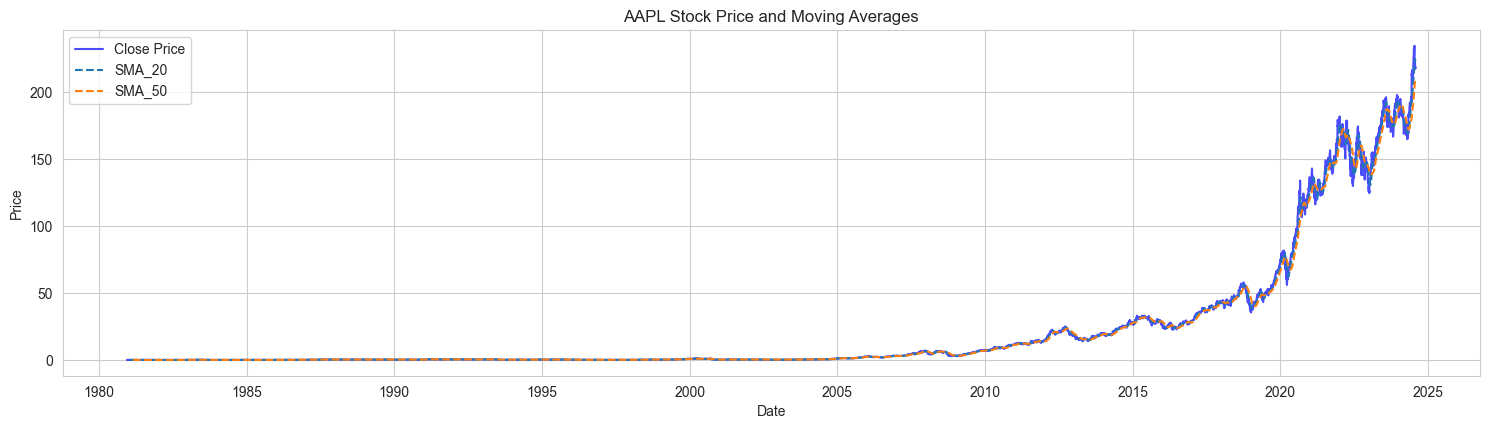

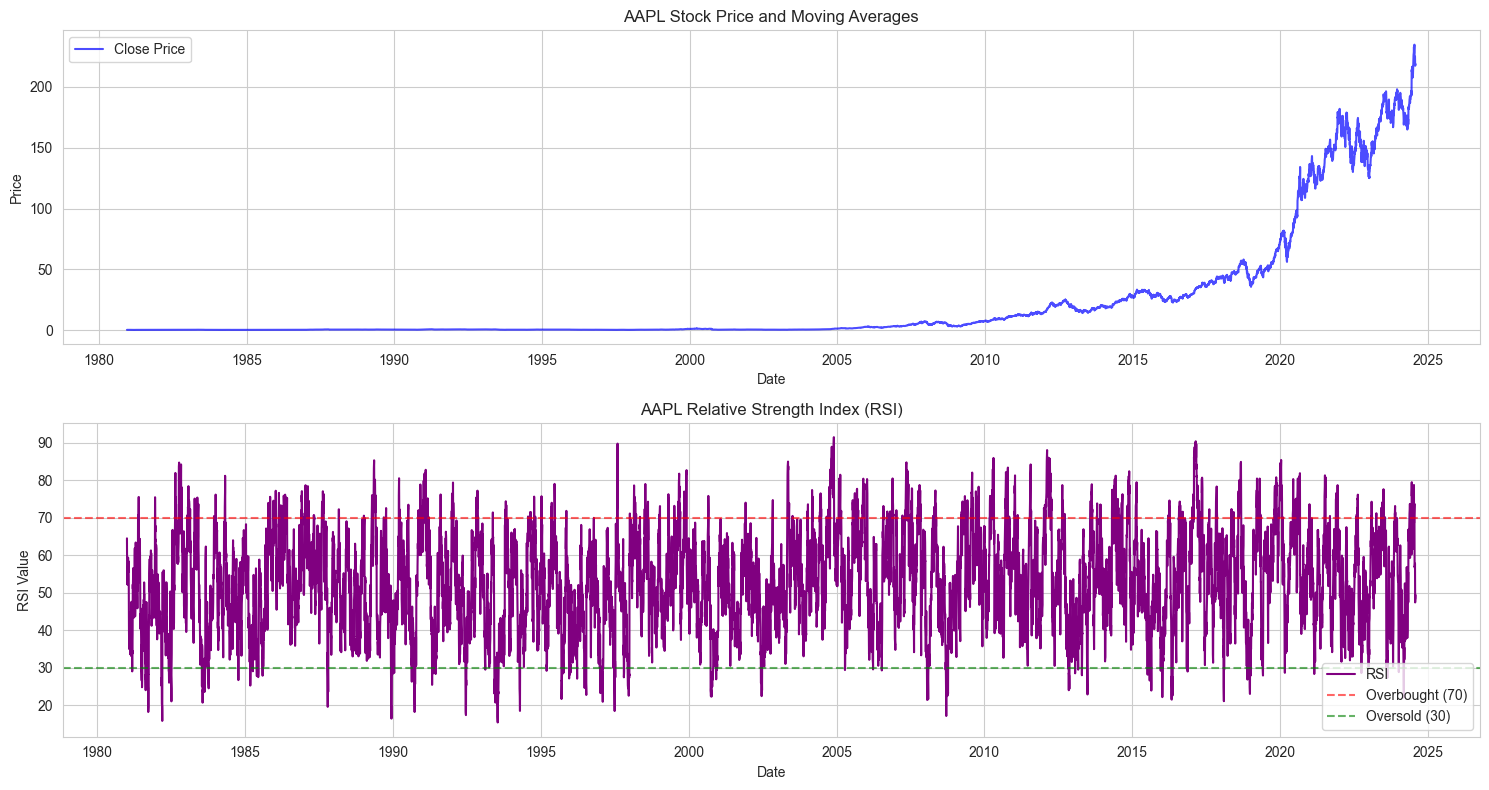

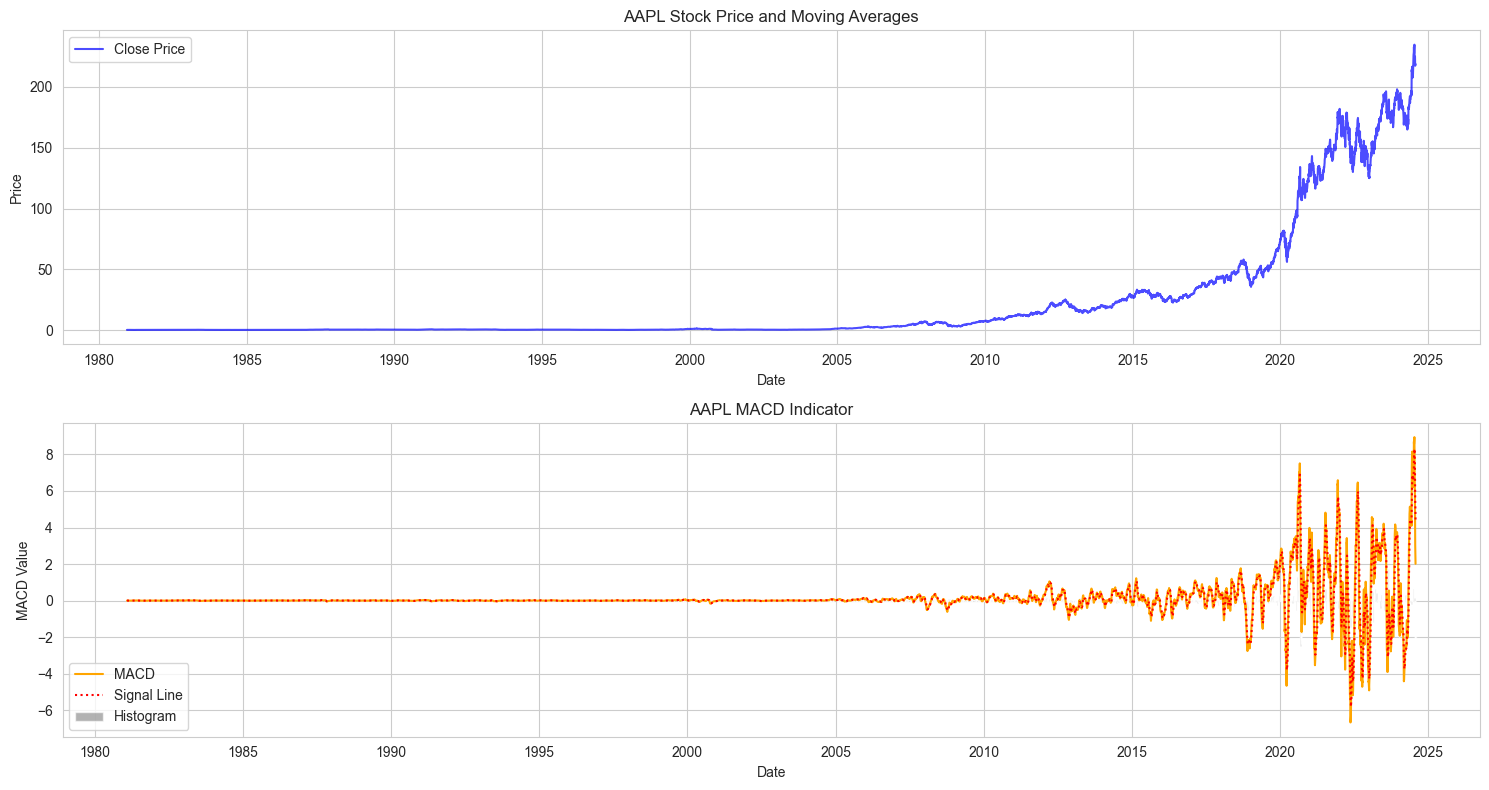


--- Processing AMZN Stock Data ---
Initial AMZN Stock Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6846 entries, 1997-05-15 to 2024-07-30
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6846 non-null   float64
 1   High          6846 non-null   float64
 2   Low           6846 non-null   float64
 3   Close         6846 non-null   float64
 4   Adj Close     6846 non-null   float64
 5   Volume        6846 non-null   int64  
 6   Dividends     6846 non-null   float64
 7   Stock Splits  6846 non-null   float64
 8   Ticker        6846 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 534.8+ KB
Initial AMZN Stock Data Head:
                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
1997-05-15  0.121875  0.125000  0.096354  0.097917   0.097917  1443120000   
1997-05-16  

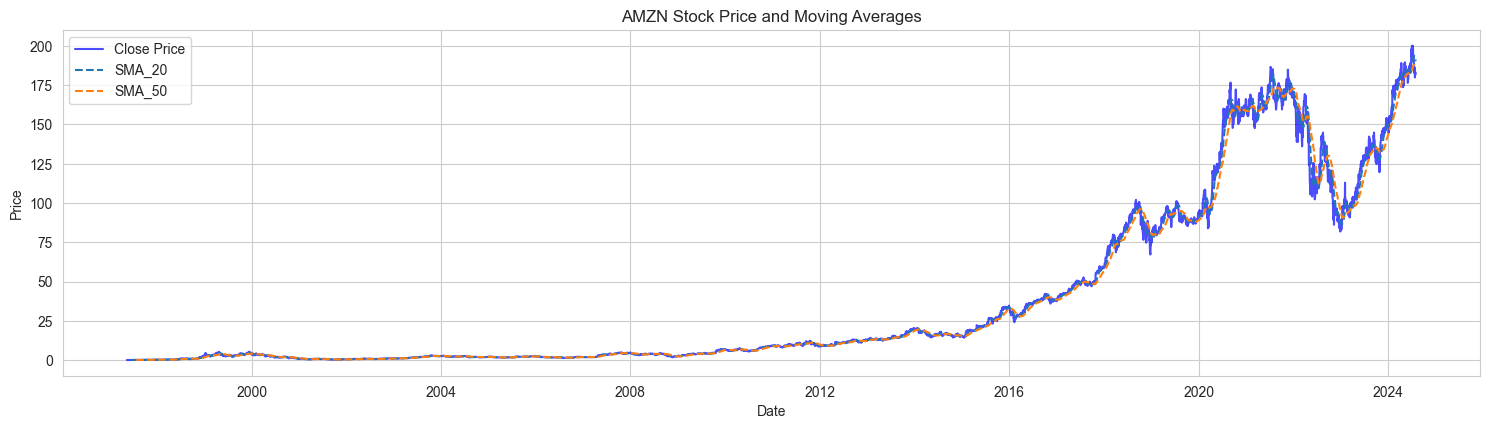

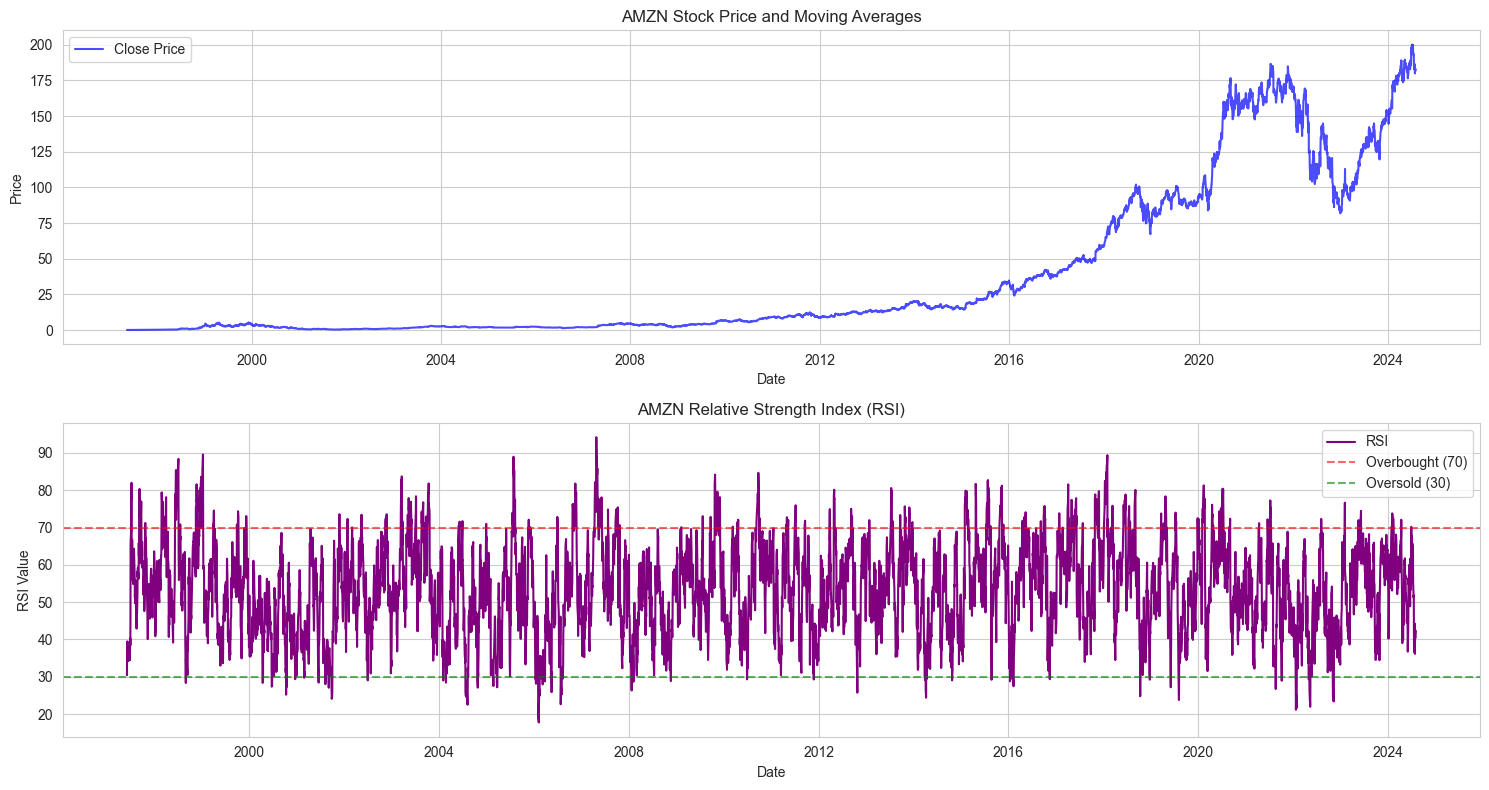

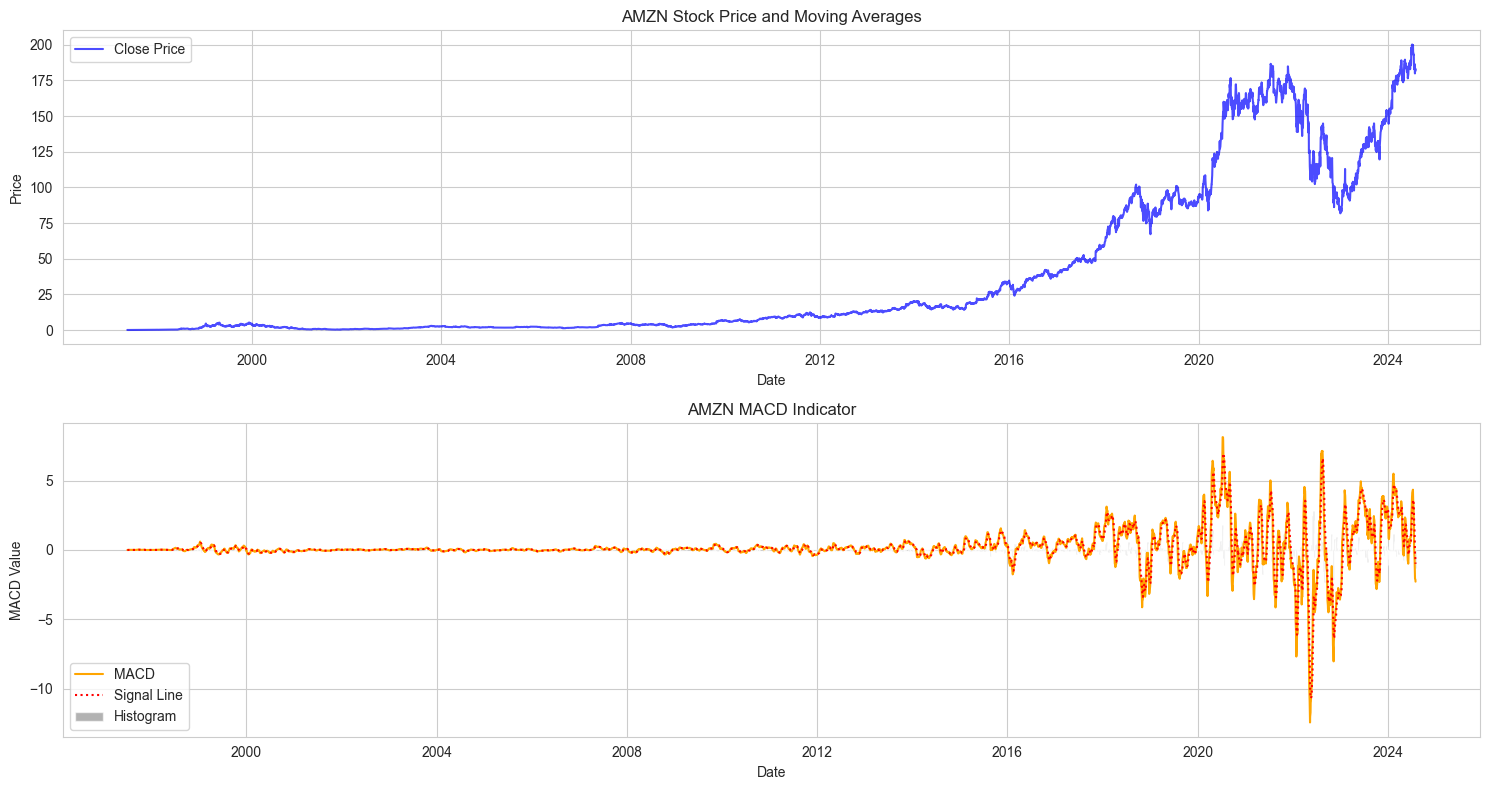


--- Processing GOOG Stock Data ---
Initial GOOG Stock Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5020 entries, 2004-08-19 to 2024-07-30
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5020 non-null   float64
 1   High          5020 non-null   float64
 2   Low           5020 non-null   float64
 3   Close         5020 non-null   float64
 4   Adj Close     5020 non-null   float64
 5   Volume        5020 non-null   int64  
 6   Dividends     5020 non-null   float64
 7   Stock Splits  5020 non-null   float64
 8   Ticker        5020 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 392.2+ KB
Initial GOOG Stock Data Head:
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2004-08-19  2.490664  2.591785  2.390042  2.499133   2.496292  897427216   
2004-08-20  2.5

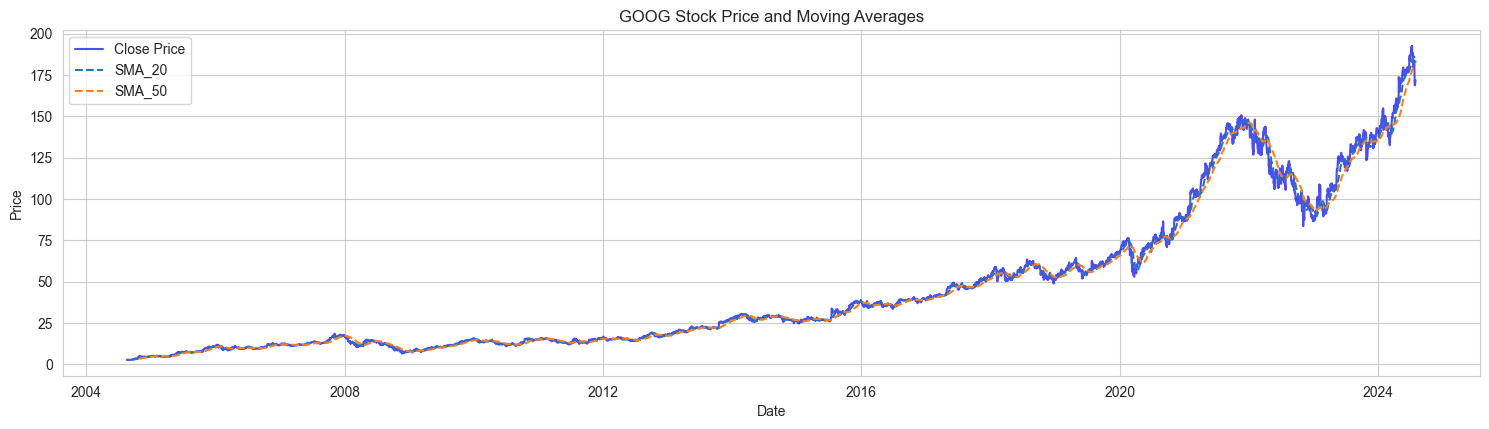

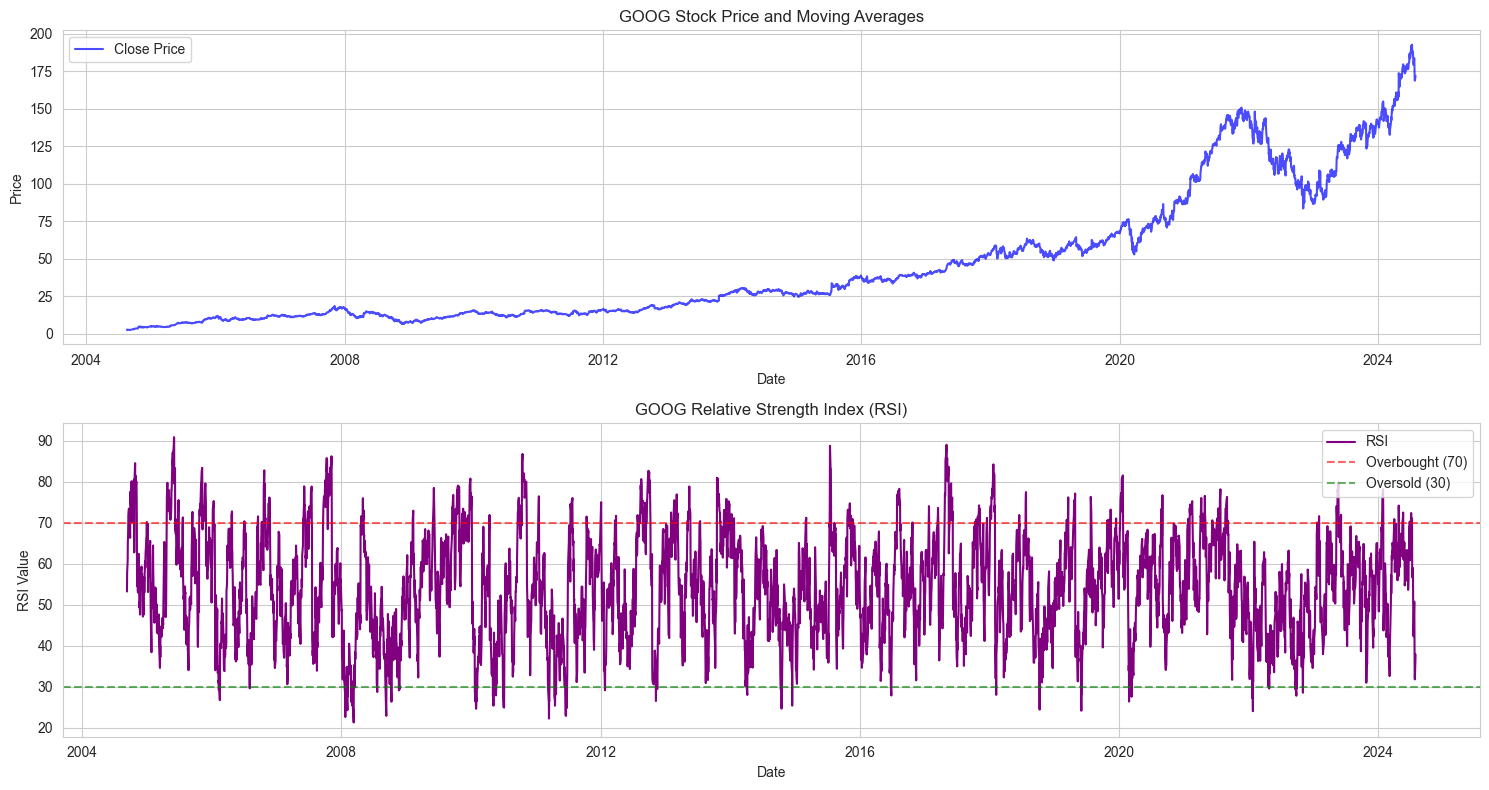

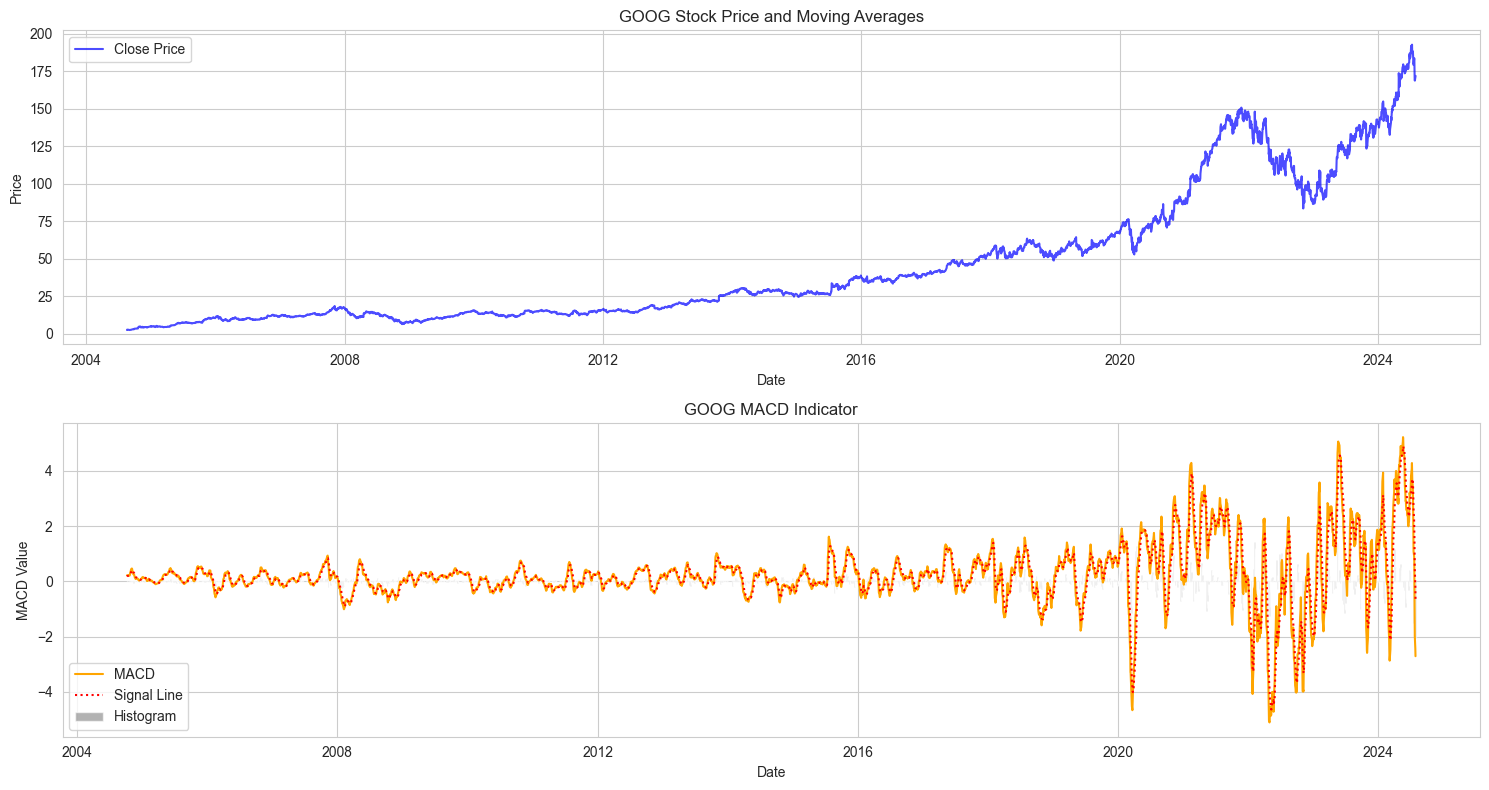


--- Processing META Stock Data ---
Initial META Stock Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2926 entries, 2012-12-12 to 2024-07-30
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          2926 non-null   float64
 1   High          2926 non-null   float64
 2   Low           2926 non-null   float64
 3   Close         2926 non-null   float64
 4   Adj Close     2926 non-null   float64
 5   Volume        2926 non-null   int64  
 6   Dividends     2926 non-null   float64
 7   Stock Splits  2926 non-null   float64
 8   Ticker        2926 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 228.6+ KB
Initial META Stock Data Head:
                 Open       High        Low      Close  Adj Close    Volume  \
Date                                                                          
2012-12-12  28.000000  28.139999  27.370001  27.580000  27.523441  46704200   
2012-1

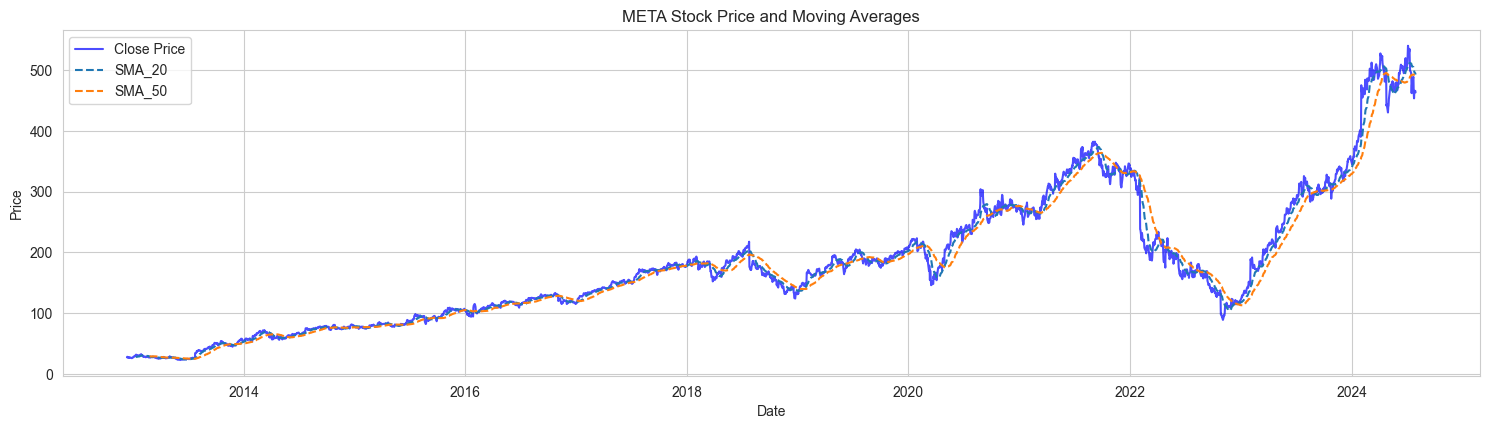

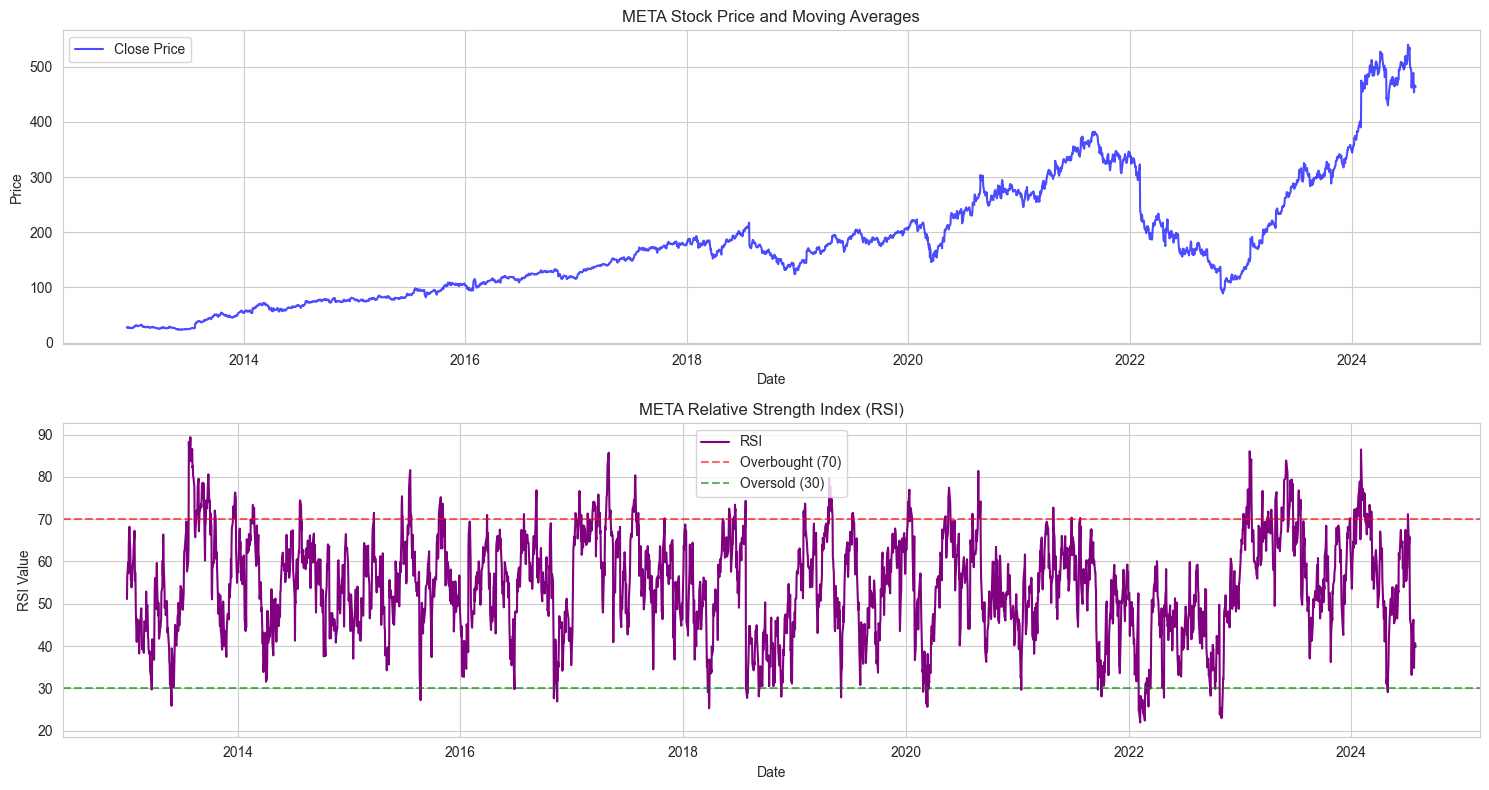

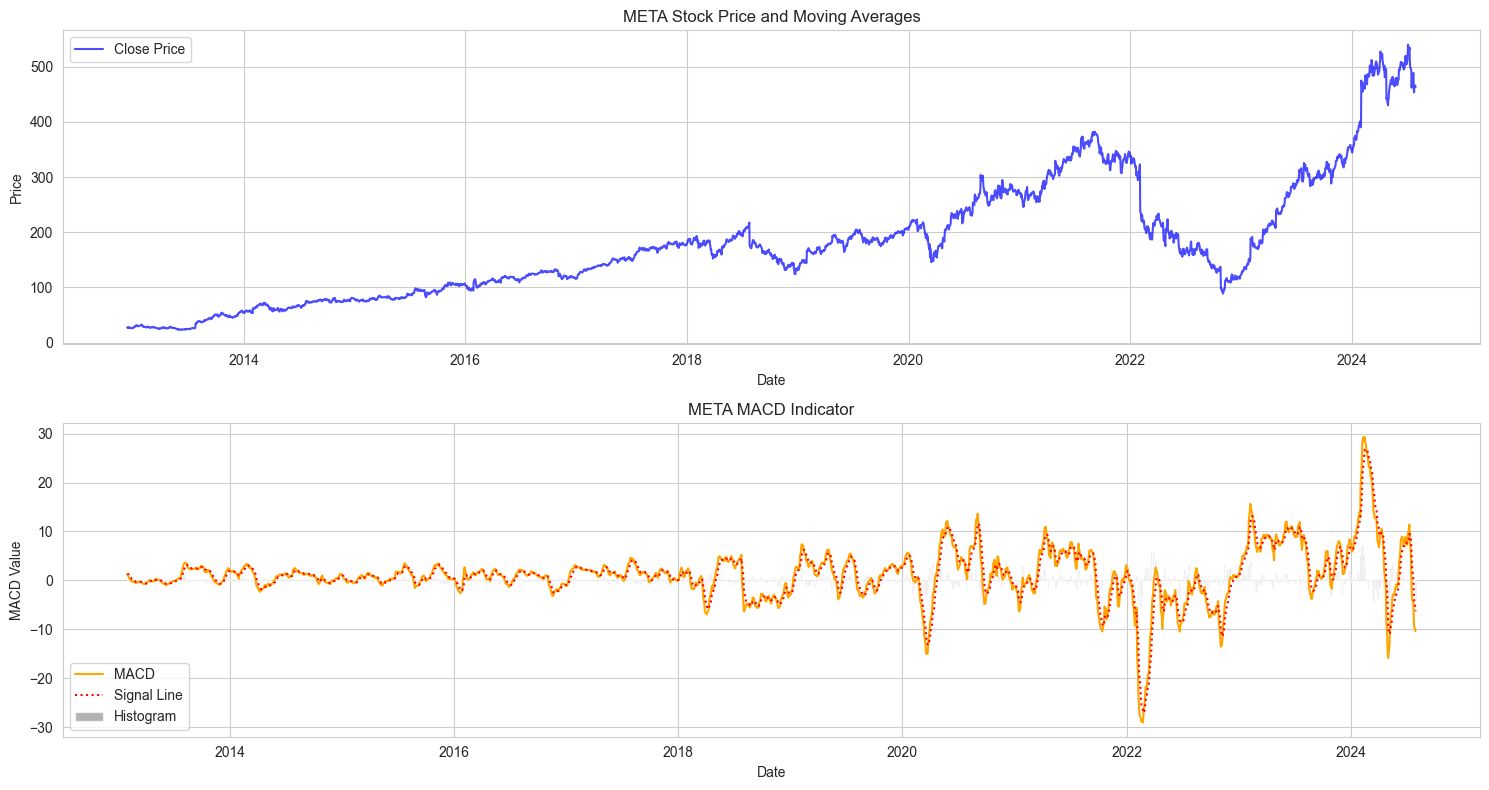


--- Processing MSFT Stock Data ---
Initial MSFT Stock Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9672 entries, 1986-03-13 to 2024-07-30
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          9672 non-null   float64
 1   High          9672 non-null   float64
 2   Low           9672 non-null   float64
 3   Close         9672 non-null   float64
 4   Adj Close     9672 non-null   float64
 5   Volume        9672 non-null   int64  
 6   Dividends     9672 non-null   float64
 7   Stock Splits  9672 non-null   float64
 8   Ticker        9672 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 755.6+ KB
Initial MSFT Stock Data Head:
                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
1986-03-13  0.088542  0.101563  0.088542  0.097222   0.059946  1031788800   
1986-03-14  

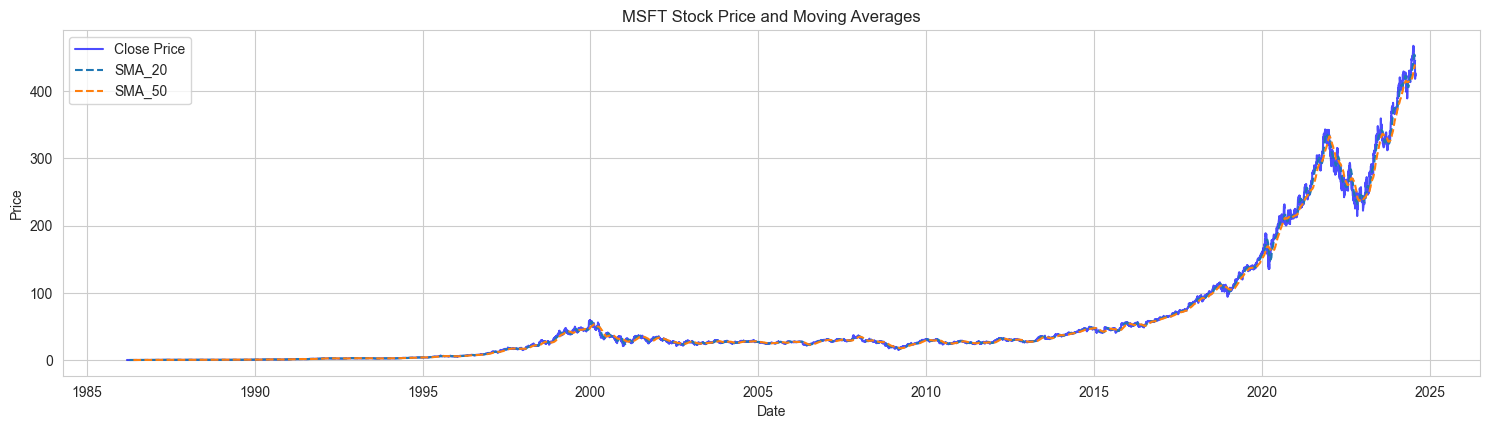

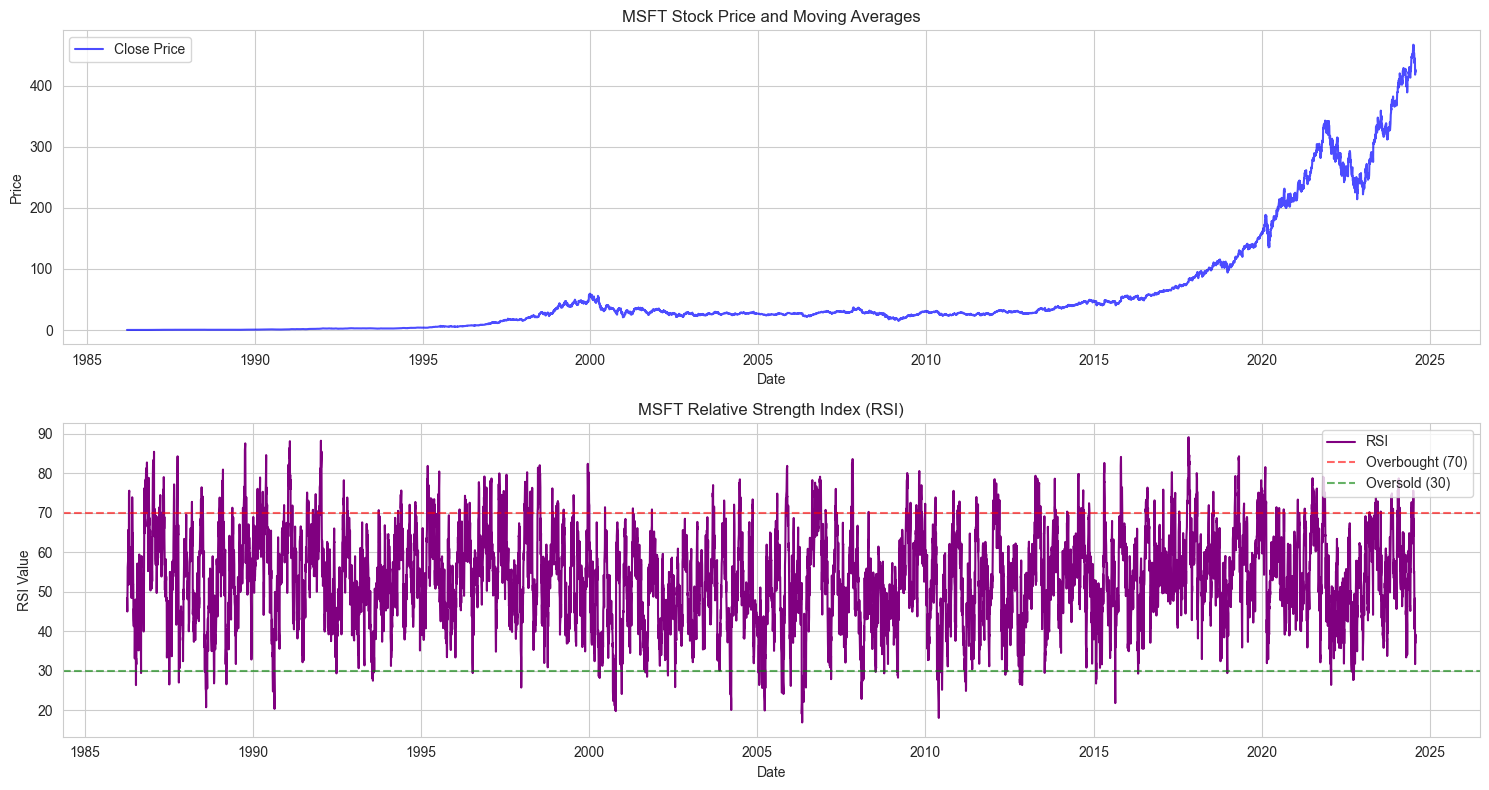

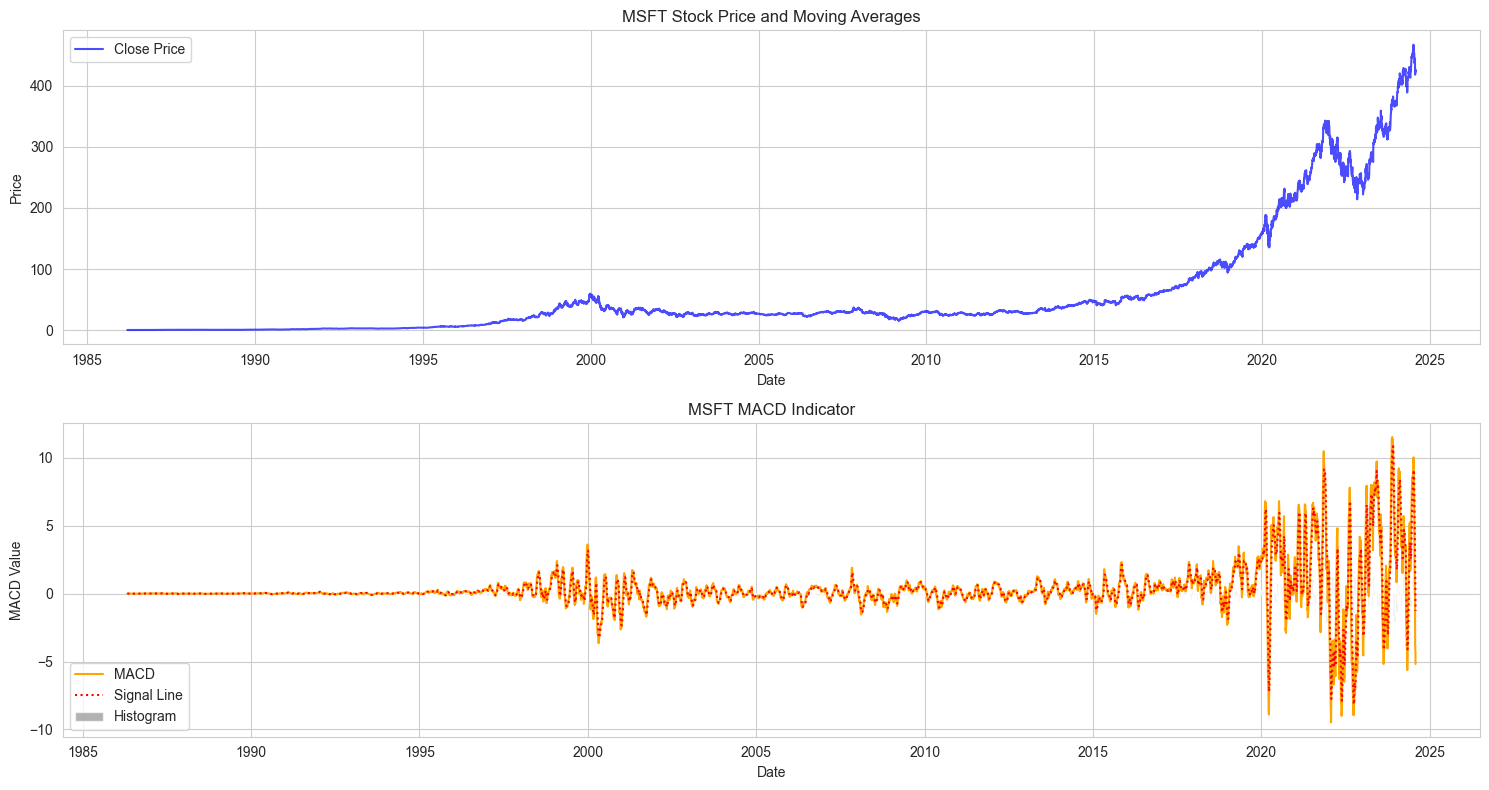


--- Processing NVDA Stock Data ---
Initial NVDA Stock Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6421 entries, 1999-01-22 to 2024-07-30
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6421 non-null   float64
 1   High          6421 non-null   float64
 2   Low           6421 non-null   float64
 3   Close         6421 non-null   float64
 4   Adj Close     6421 non-null   float64
 5   Volume        6421 non-null   int64  
 6   Dividends     6421 non-null   float64
 7   Stock Splits  6421 non-null   float64
 8   Ticker        6421 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 501.6+ KB
Initial NVDA Stock Data Head:
                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
1999-01-22  0.043750  0.048828  0.038802  0.041016   0.037621  2714688000   
1999-01-25  

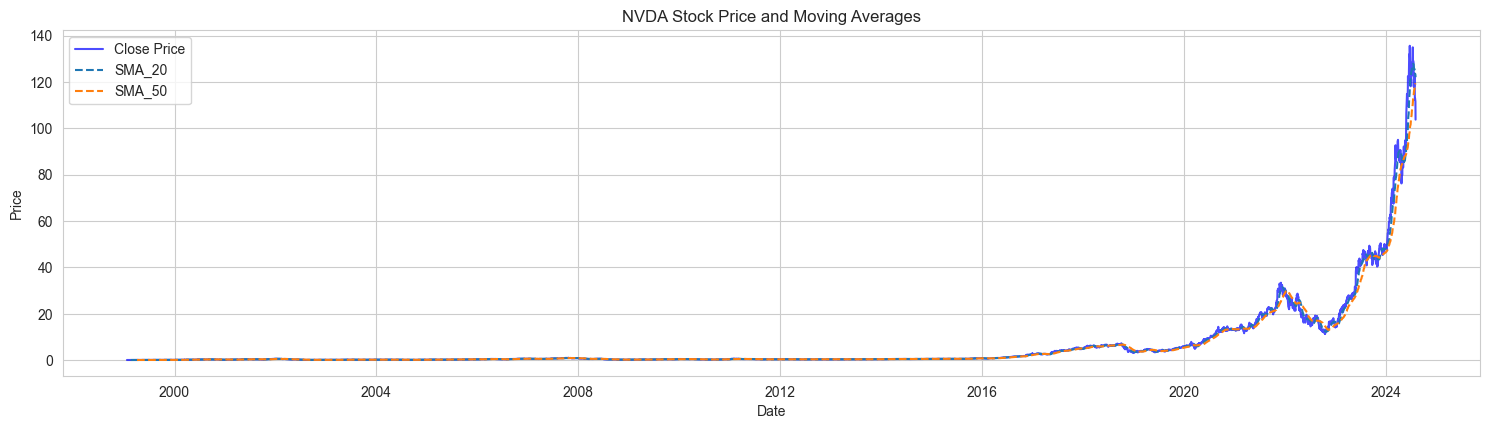

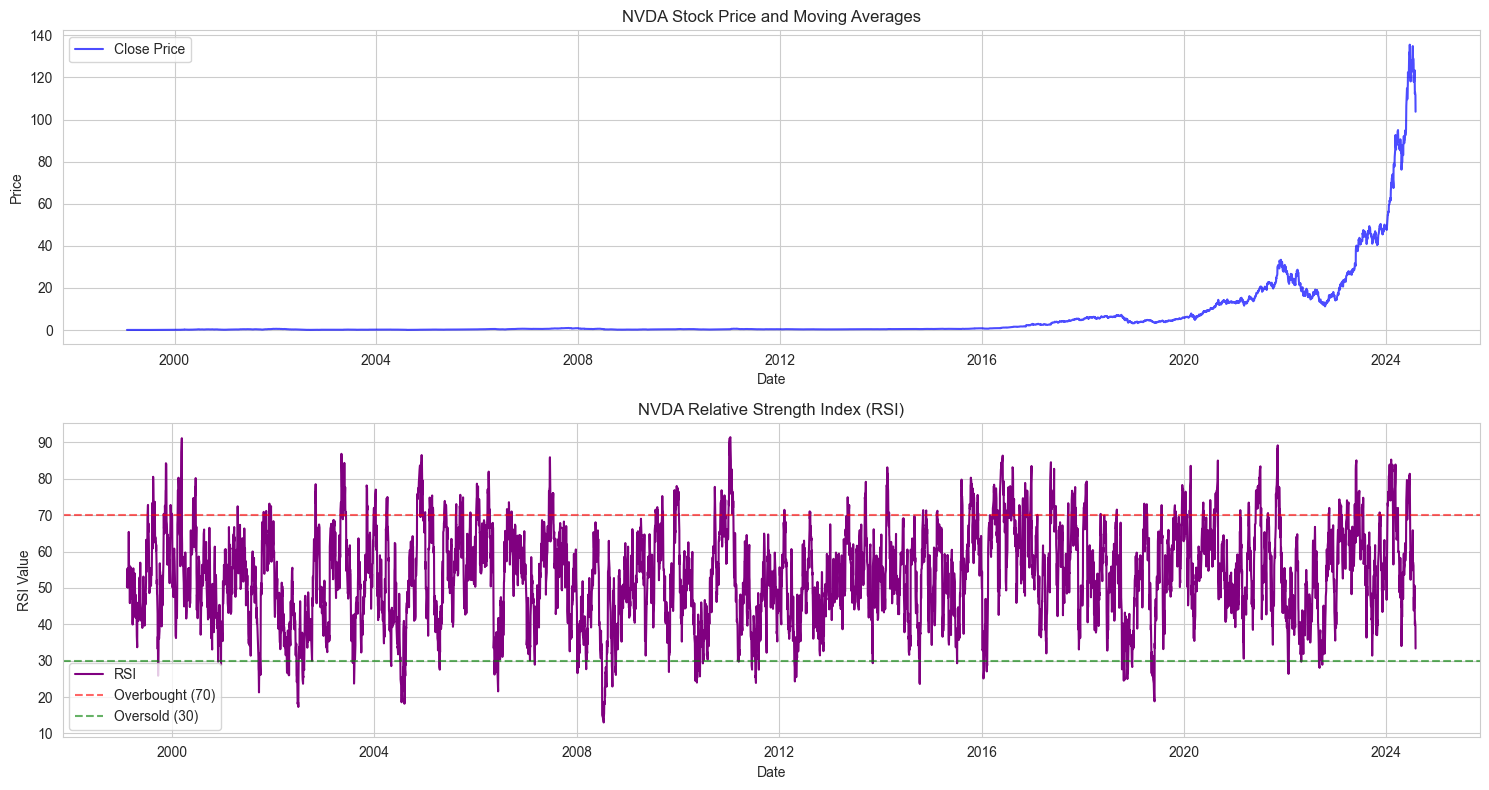

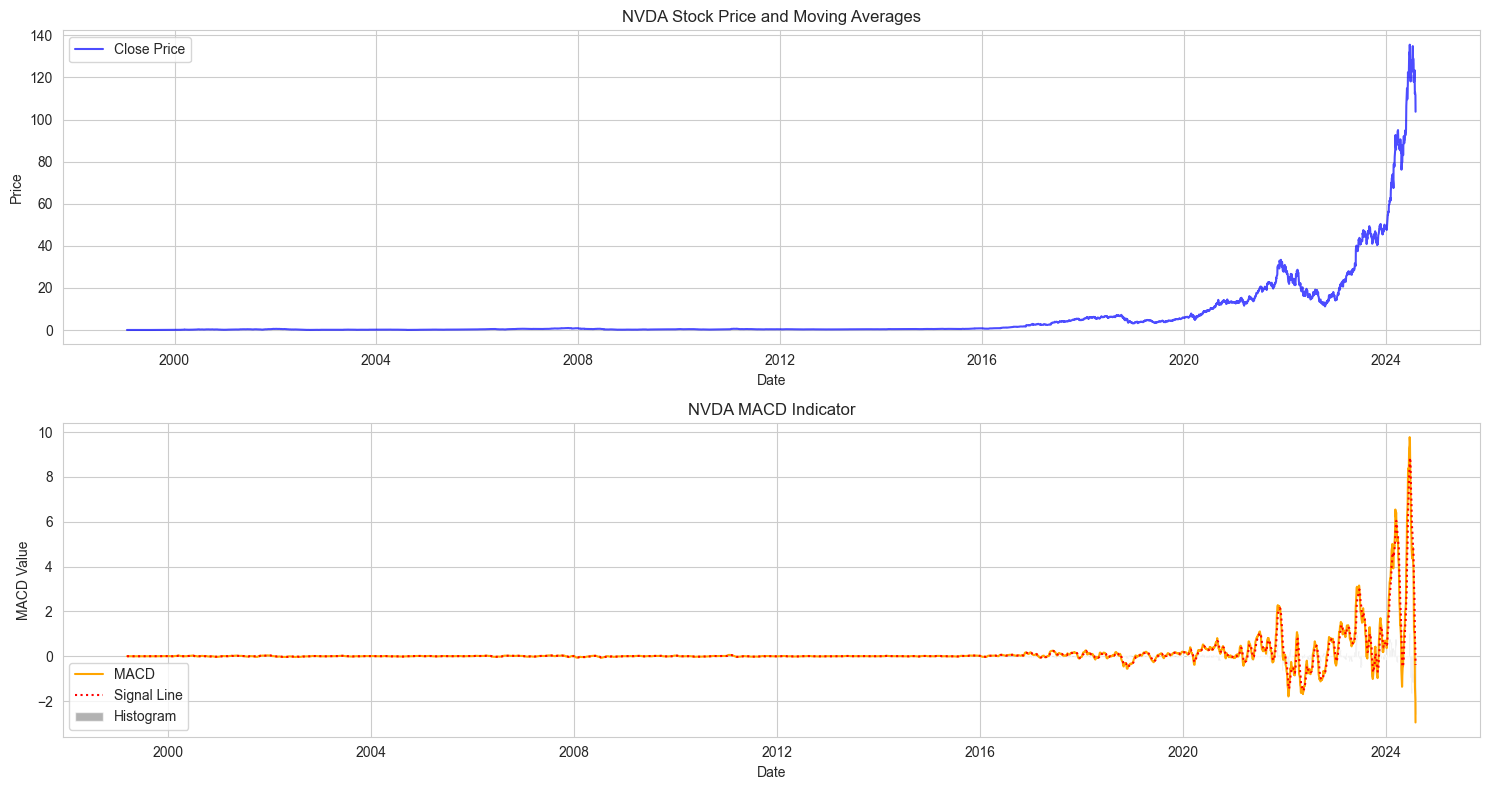


--- Processing TSLA Stock Data ---
Initial TSLA Stock Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3545 entries, 2010-06-29 to 2024-07-30
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          3545 non-null   float64
 1   High          3545 non-null   float64
 2   Low           3545 non-null   float64
 3   Close         3545 non-null   float64
 4   Adj Close     3545 non-null   float64
 5   Volume        3545 non-null   int64  
 6   Dividends     3545 non-null   float64
 7   Stock Splits  3545 non-null   float64
 8   Ticker        3545 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 277.0+ KB
Initial TSLA Stock Data Head:
                Open      High       Low     Close  Adj Close     Volume  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667   1.592667  281494500   
2010-06-30  1.7

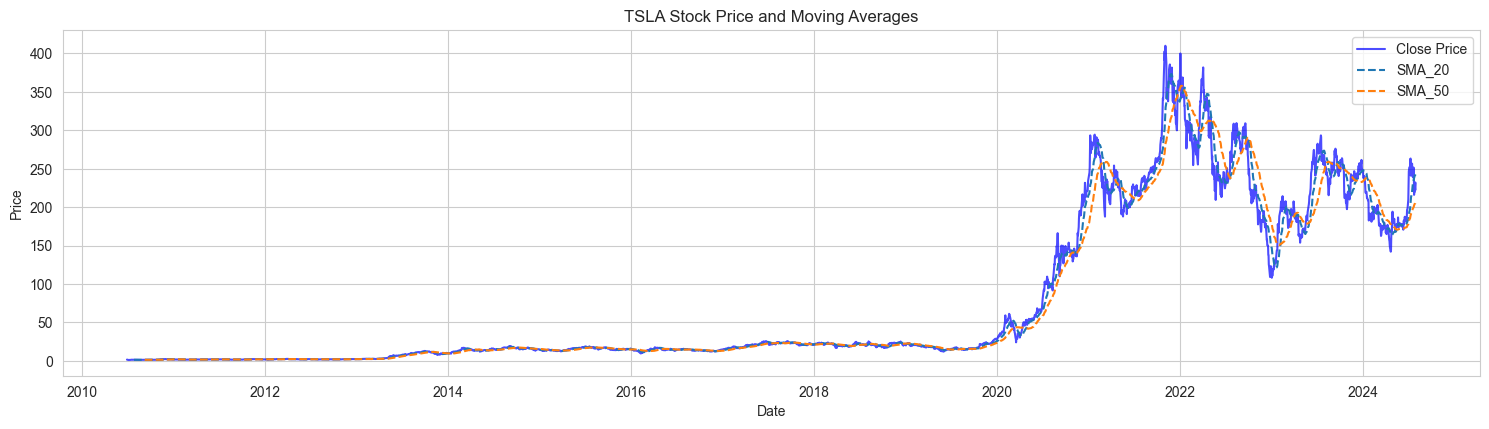

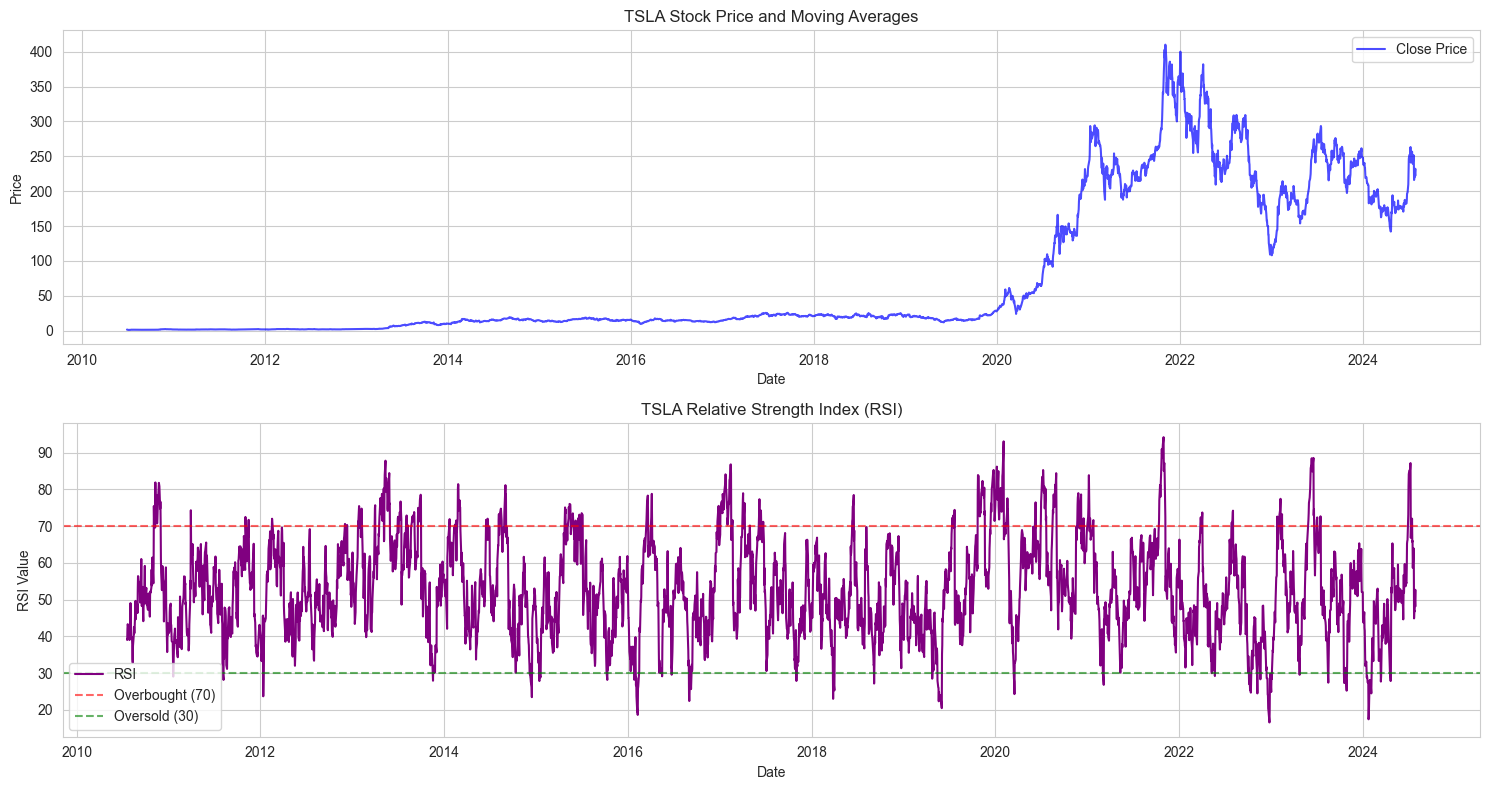

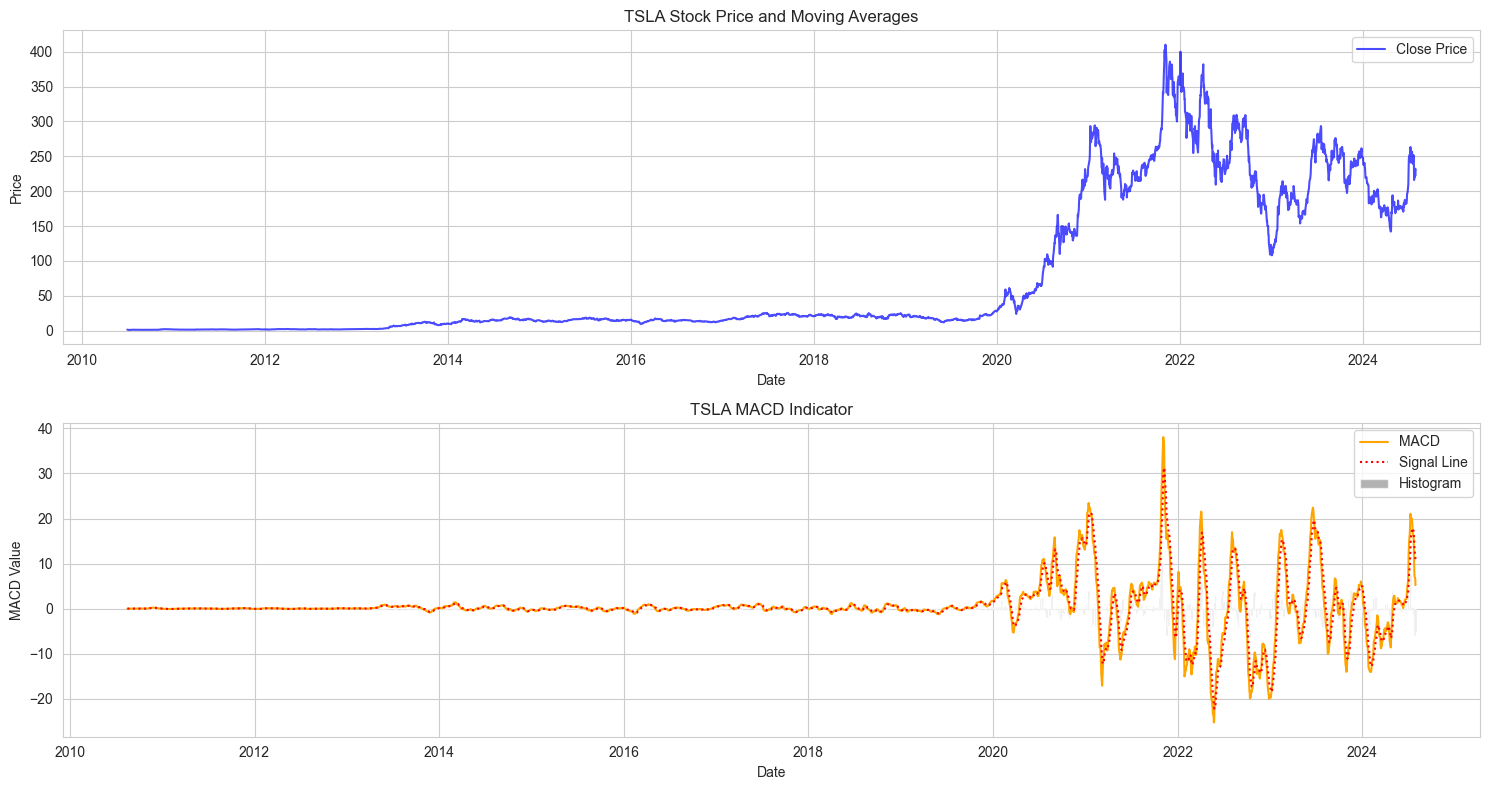

In [15]:
if data: # Check if any data was loaded
    for ticker, stock_df in data.items():
        print(f"\n--- Processing {ticker} Stock Data ---")
        print(f"Initial {ticker} Stock Data Info:")
        stock_df.info()
        print(f"Initial {ticker} Stock Data Head:")
        print(stock_df.head())

        # --- 2. Clean Stock Data ---
        print(f"\nCleaning {ticker} stock data...")
        stock_cleaner = DataCleaner(stock_df) 
        cleaned_stock_df = stock_cleaner.clean_stock_data()
        
        print(f"\nCleaned {ticker} Stock Data Info:")
        cleaned_stock_df.info()
        print(f"\nCleaned {ticker} Stock Data Head:")
        print(cleaned_stock_df.head())

        # --- 3. Calculate Technical Indicators ---
        print(f"\nCalculating Technical Indicators for {ticker}...")
        financial_analyzer = FinancialAnalyzer(cleaned_stock_df)
        
        # Calculate Moving Averages
        df_with_sma = financial_analyzer.calculate_moving_averages(periods=[20, 50])
        print(f"\nDataFrame with SMAs for {ticker} (Tail):")
        print(df_with_sma.tail())

        # Calculate RSI
        df_with_rsi = financial_analyzer.calculate_rsi()
        print(f"\nDataFrame with RSI for {ticker} (Tail):")
        print(df_with_rsi.tail())

        # Calculate MACD
        df_with_macd = financial_analyzer.calculate_macd()
        print(f"\nDataFrame with MACD for {ticker} (Tail):")
        print(df_with_macd.tail())

        # # NEW: Calculate PyNance Metrics
        # df_with_pynance_metrics = financial_analyzer.calculate_pynance_metrics()
        # print(f"\nDataFrame with PyNance Metrics for {ticker} (Tail):")
        # print(df_with_pynance_metrics[['Close', 'Cumulative_Return_PyNance']].tail()) 

        # --- 4. Visualize Data ---
        print(f"\nVisualizing {ticker} Stock Data with Indicators...")
        visualizer = Visualizer() 
        
        # Plotting Close Price with SMAs
        visualizer.plot_stock_prices_with_indicators(df_with_sma, ticker, indicators=['SMA_20', 'SMA_50'])

        # Plotting RSI
        visualizer.plot_stock_prices_with_indicators(df_with_rsi, ticker, indicators=['RSI'])

        # Plotting MACD
        visualizer.plot_stock_prices_with_indicators(df_with_macd, ticker, indicators=['MACD'])

        # # You might also want to visualize the cumulative returns calculated by PyNance
        # plt.figure(figsize=(14, 7))
        # df_with_pynance_metrics['Cumulative_Return_PyNance'].plot(title=f'{ticker} Cumulative Returns (PyNance)')
        # plt.xlabel('Date')
        # plt.ylabel('Cumulative Return (%)')
        # plt.grid(True)
        # plt.show()

else:
    print("No stock data was loaded. Please check file paths and data directory.")
